In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

In [2]:
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'feature_names', 'target_names', 'target', 'DESCR'])

In [3]:
len(cancer['feature_names'])

30

In [4]:
print('Target Names: %s' % cancer['target_names'])
print('Feature Names: %s\t' % cancer['feature_names'])

Target Names: ['malignant' 'benign']
Feature Names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']	


In [5]:
df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
df['target'] = cancer.target

In [6]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


df['target'] = df['target'].map({0:'malignant',1:'benign'})
df['target'].value_counts()

In [7]:
X = df[cancer.feature_names.tolist()]
y = df['target']

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                random_state=0)

In [9]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, accuracy_score
gb = GradientBoostingClassifier(n_estimators=120,
                               random_state=0)

In [10]:
gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)
scores = cross_val_score(gb, X_train,y_train, cv=5)
scores

array([ 0.95348837,  0.98837209,  0.95294118,  0.95294118,  0.96428571])

Model Report:
Accuracy: 1.00
Accuracy2:0.96
AUC score:0.96


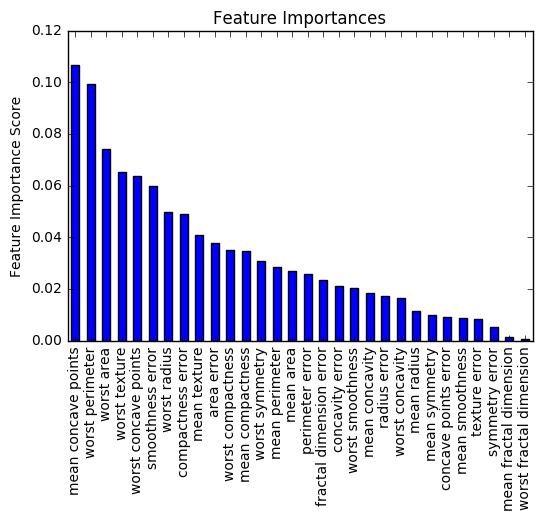

In [11]:
print('Model Report:')
print('Accuracy: {:.2f}'.format(gb.score(X_test,y_pred)))
print('Accuracy2:{:.2f}'.format(accuracy_score(y_test,
                                                     y_pred)))
print('AUC score:{:.2f}'.format(roc_auc_score(y_test,
                                                    y_pred)))
feat_imp = pd.Series(gb.feature_importances_,
                     X_train.columns.tolist()).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')
plt.show()

In [12]:
#min_samples_split : This should be ~0.5-1% of total values
#min_samples_leaf : This  is just used for overfitting prevention and
#                   again a small value because of imbalanced class
#max_depth : should be chosen (5-8) based on the number of observations
#max_features : 'sqrt' General thumb rule to start with square root
#subsample : 0.8 this is a commonly used start value
from sklearn.model_selection import GridSearchCV
param_test1 = {'n_estimators': range(20,101,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(
    learning_rate = 0.1, min_samples_split=5, max_depth=5,
    max_features='sqrt', random_state=7),scoring ='roc_auc',
                        param_grid = param_test1, cv=5)
gsearch1.fit(X_train,y_train)

                    
                        

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=5, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=7,
              subsample=1.0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': range(20, 101, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [13]:
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

C:\Users\Max Yap\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.98715, std: 0.00947, params: {'n_estimators': 20},
  mean: 0.98880, std: 0.01016, params: {'n_estimators': 30},
  mean: 0.99119, std: 0.00596, params: {'n_estimators': 40},
  mean: 0.99178, std: 0.00573, params: {'n_estimators': 50},
  mean: 0.99261, std: 0.00618, params: {'n_estimators': 60},
  mean: 0.99284, std: 0.00660, params: {'n_estimators': 70},
  mean: 0.99284, std: 0.00637, params: {'n_estimators': 80},
  mean: 0.99249, std: 0.00658, params: {'n_estimators': 90},
  mean: 0.99214, std: 0.00676, params: {'n_estimators': 100}],
 {'n_estimators': 70},
 0.99284172263618597)

In [14]:
param_test2 = {'max_depth':range(5,16,2), 'min_samples_split':range(10,81,10)}
gsearch2 = GridSearchCV(estimator=GradientBoostingClassifier(
    learning_rate=0.1, n_estimators=70,max_features='sqrt',
    random_state=7), param_grid=param_test2, scoring='roc_auc',cv=5)
gsearch2.fit(X_train,y_train)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

C:\Users\Max Yap\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.99085, std: 0.00747, params: {'max_depth': 5, 'min_samples_split': 10},
  mean: 0.99108, std: 0.00719, params: {'max_depth': 5, 'min_samples_split': 20},
  mean: 0.99073, std: 0.00716, params: {'max_depth': 5, 'min_samples_split': 30},
  mean: 0.99143, std: 0.00700, params: {'max_depth': 5, 'min_samples_split': 40},
  mean: 0.99179, std: 0.00633, params: {'max_depth': 5, 'min_samples_split': 50},
  mean: 0.99096, std: 0.00795, params: {'max_depth': 5, 'min_samples_split': 60},
  mean: 0.99190, std: 0.00733, params: {'max_depth': 5, 'min_samples_split': 70},
  mean: 0.99131, std: 0.00786, params: {'max_depth': 5, 'min_samples_split': 80},
  mean: 0.99202, std: 0.00701, params: {'max_depth': 7, 'min_samples_split': 10},
  mean: 0.99132, std: 0.00739, params: {'max_depth': 7, 'min_samples_split': 20},
  mean: 0.99167, std: 0.00714, params: {'max_depth': 7, 'min_samples_split': 30},
  mean: 0.99202, std: 0.00690, params: {'max_depth': 7, 'min_samples_split': 40},
  mean: 0.99178,

Model Report:
Accuracy: 1.00
Accuracy2:0.96
AUC score:0.96


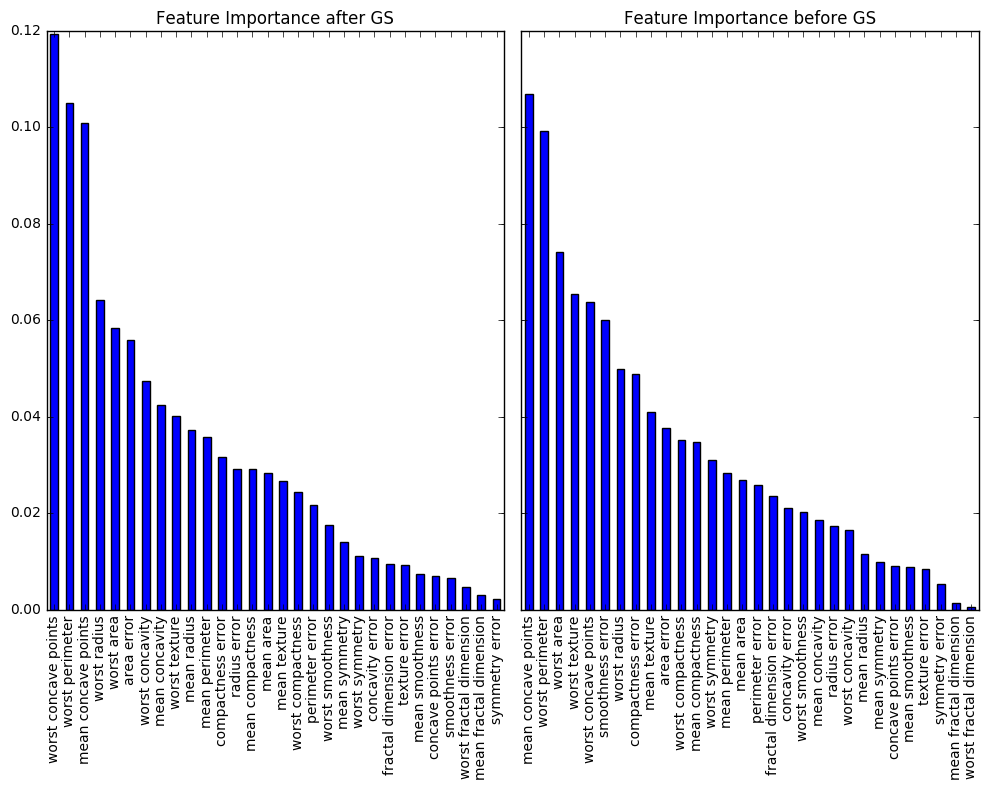

In [15]:

print('Model Report:')
print('Accuracy: {:.2f}'.format(gb.score(X_test,y_pred)))
print('Accuracy2:{:.2f}'.format(accuracy_score(y_test,
                                                     y_pred)))
print('AUC score:{:.2f}'.format(roc_auc_score(y_test,
                                                    y_pred)))
fig, (ax1,ax2)= plt.subplots(figsize=(10,8),nrows=1,ncols=2,sharey=True)
feat_imp2 = pd.Series(gsearch2.best_estimator_.feature_importances_,
                     X_train.columns.tolist()).sort_values(ascending=False)
feat_imp2.plot(kind='bar',ax=ax1, title='Feature Importance after GS')
feat_imp.plot(kind='bar',ax=ax2,title = 'Feature Importance before GS')
plt.tight_layout()
plt.show()
